In [ ]:
!pip install --upgrade --user google-cloud-aiplatform --quiet

In [1]:
import vertexai
from vertexai.preview.generative_models import GenerativeModel, Image

In [2]:
PROJECT_ID = "datastaxastra-demo"
REGION = "us-central1"
vertexai.init(project=PROJECT_ID, location=REGION)

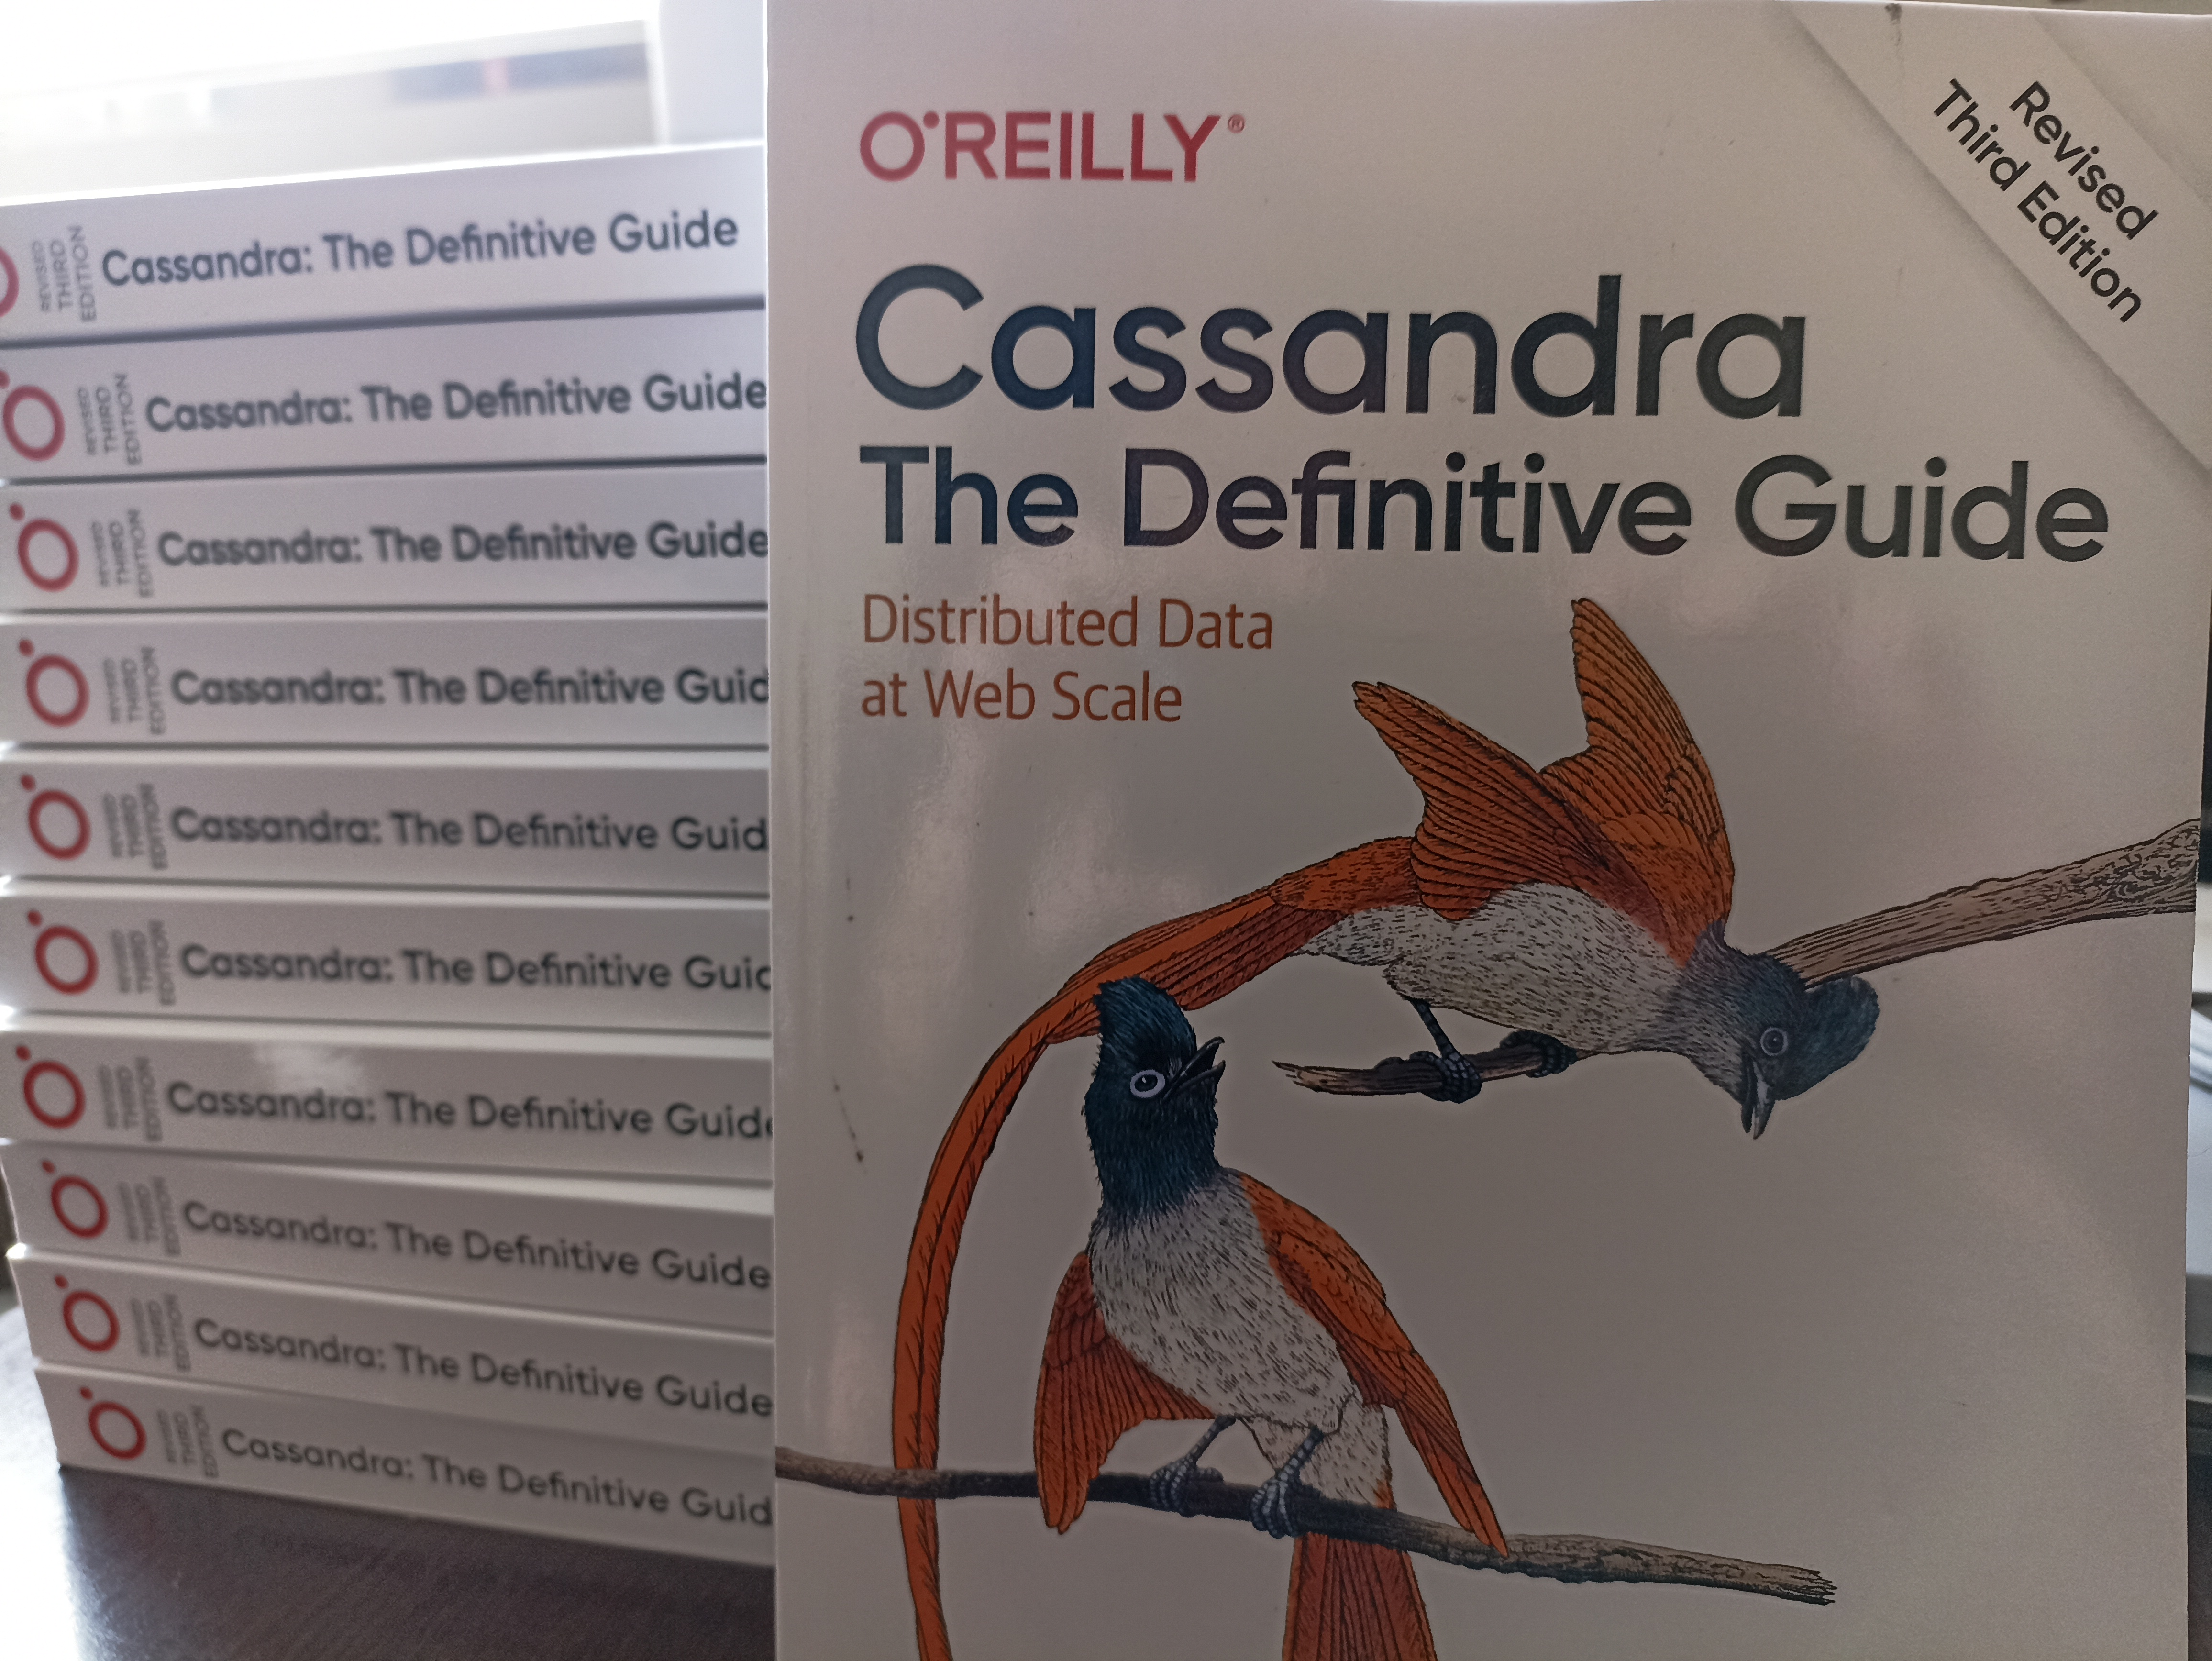

In [4]:
from IPython.display import Image as ShowImage, display
IMAGE_FILE = "/users/samuel.matioli/Downloads/IMG_20231213_102509.jpg"
display(ShowImage(filename=IMAGE_FILE, width=400) )

In [5]:
# Describing an image
image = Image.load_from_file(IMAGE_FILE)

generative_multimodal_model = GenerativeModel("gemini-pro-vision")
response = generative_multimodal_model.generate_content(["What is shown in this image?", image])

print(response)

candidates {
  content {
    role: "model"
    parts {
      text: " A stack of books with the top book titled \"Cassandra: The Definitive Guide\""
    }
  }
  finish_reason: STOP
  safety_ratings {
    category: HARM_CATEGORY_HARASSMENT
    probability: NEGLIGIBLE
  }
  safety_ratings {
    category: HARM_CATEGORY_HATE_SPEECH
    probability: NEGLIGIBLE
  }
  safety_ratings {
    category: HARM_CATEGORY_SEXUALLY_EXPLICIT
    probability: NEGLIGIBLE
  }
  safety_ratings {
    category: HARM_CATEGORY_DANGEROUS_CONTENT
    probability: NEGLIGIBLE
  }
}
usage_metadata {
  prompt_token_count: 265
  candidates_token_count: 16
  total_token_count: 281
}



In [6]:
#Getting a multimodal embedding
from vertexai.preview.vision_models import MultiModalEmbeddingModel, Image
model = MultiModalEmbeddingModel.from_pretrained("multimodalembedding@001")
image = Image.load_from_file(IMAGE_FILE)
emb = model.get_embeddings(image=image, contextual_text="Authors Jeff Carpenter and Eben Hewitt demonstrate the advantages of Cassandra’s non-relational design, with special attention to data modeling. If you’re a developer, DBA, or application architect looking to solve a database scaling issue or future-proof your application, this guide helps you harness Cassandra’s speed and flexibility.")
emb

MultiModalEmbeddingResponse(_prediction_response=Prediction(predictions=[{'textEmbedding': [0.00374091114, -0.0263243485, 0.00891518872, 0.0199196227, -0.0123572974, 0.0245026406, 0.0216890927, 0.00699598528, -0.00327764335, -0.00825622398, -0.0209842138, -0.0108310888, 0.0188301355, 0.0173046067, -0.0146794943, -0.00402927306, 0.0324085094, 0.0317695253, 0.00565971388, -0.0246333461, 0.0312458463, 0.00474511227, -0.00279753911, -0.000387998327, 0.00504936883, 0.00794353615, -0.00819277763, -0.0101934345, 0.0422776155, 0.00456481846, 0.02621888, 0.0178019237, -0.035191495, 0.00510713924, 0.0201031733, 0.042107407, -0.00472247321, -0.0262932945, -0.000603347, 0.0136859417, 0.00339641073, 0.00670252275, 0.0105569242, -0.0195299294, 9.79068354e-05, -0.0265803952, -0.018068986, 0.0477031469, 0.0187783744, 0.0118007632, 0.0131712183, 0.0140267452, 0.00195323513, 0.00184650719, 0.0162957497, 0.000748480496, -0.0243331548, -0.017746402, 0.0232249647, -0.0222012214, 0.0263989884, 0.044639539, 

In [9]:
# Responses are already normalized
print(len(emb.image_embedding))

1408


In [10]:
# Responses are already normalized
print(len(emb.text_embedding))


1408


In [37]:
# Combining both embeddings for enabling multi modal search
import numpy as np

average_embedding = (np.array(emb.image_embedding) + np.array(emb.text_embedding)) / 2   
average_embedding

print(emb.image_embedding[:5])
print(emb.text_embedding[:5])
print(average_embedding[:5])

[0.00767819537, 0.0190926902, 0.0350803658, 0.0219012164, 0.00126273185]
[0.00374091114, -0.0263243485, 0.00891518872, 0.0199196227, -0.0123572974]
[ 0.00570955 -0.00361583  0.02199778  0.02091042 -0.00554728]
